In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml
import sys
import jax

sys.path.append("../lib")
import utils
from nuance import Nuance

# Load data
df = pd.read_csv("/Users/lgrcia/Downloads/lionel_9march/P5.20649984_R3.5_1415.2429694326006.csv")
time, flux, error = df.values.T
t_0 = time[0]
time -= t_0

flux[1000] = 1.1

X = utils.poly_X(time, 3)
params = yaml.full_load(open("../data/gp.yaml", "r"))
kernel = utils.build_gp(params, time).kernel
nu = Nuance(time, flux, kernel=kernel, error=error, X=X)

# Masking
nu = Nuance(time, flux, kernel=kernel, error=error, X=X)

window = 30
r = flux - np.mean(flux)
mask = np.array(r < np.std(r) * 4)
ups = np.flatnonzero(~mask)
if len(ups) > 0:
    mask[
        np.hstack(
            [np.arange(max(u - window, 0), min(u + window, len(nu.time))) for u in ups]
        )
    ] = False

In [14]:
from nuance import Nuance

nu = Nuance(time[mask], flux[mask], error[mask], kernel=kernel, X=X[:, mask])

# Linear search
t0s = time.copy()
Ds = np.linspace(0.01, 0.1, 10)
nu.linear_search(t0s, Ds)

# First search
periods = np.linspace(0.8, 12.0, 15000)
search = nu.periodic_search(periods)

# Second search
nu2 = nu.mask(*search.best)
search2 = nu2.periodic_search(periods)

#yaml.dump([search.best, search2.best], open(snakemake.output[0], "w"))"""

100%|█████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [00:50<00:00, 298.12it/s]


In [18]:
((3*2000)/60)/

100.0

(-0.11955648881430411, 0.11955648881430411)

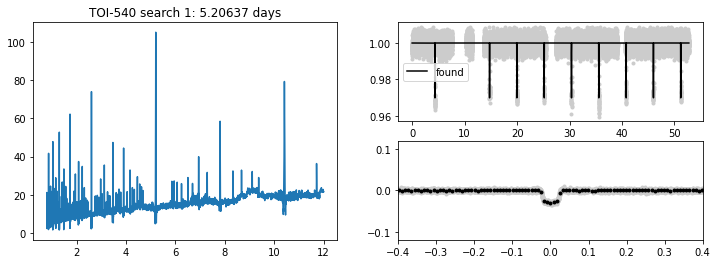

In [15]:
from nuance.utils import phase

def binn(x, y, n):
    N = int(len(x)/n)
    ns = np.histogram(x, N)[0]
    bx = np.histogram(x, N, weights=x)[0]/ns
    by = np.histogram(x, N, weights=y)[0]/ns
    return bx, by

plt.figure(None, (12, 4))
t0, D, P = search.best

plt.subplot(2, 2, (1, 3))
plt.plot(search.periods, search.Q_snr)
plt.title(f"TOI-540 search 1: {P:.5f} days")

mean, astro, noise = nu.models(t0, D, P)

plt.subplot(2, 2, 2)
plt.plot(nu.time, nu.flux, ".", c="0.8")
plt.plot(nu.time, astro + mean, c="k", label="found")
ylim = plt.ylim()
_ = plt.legend()

plt.subplot(2, 2, 4)
mean, astro, noise = nu.models(t0, D, P)
phi = phase(nu.time, t0, P)
detrended = nu.flux - noise - mean
plt.plot(phi, detrended, ".", c=".8")
plt.plot(*binn(phi, detrended, 50), ".", c="k")
plt.xlim(*(np.array([-1, 1])*10*D))
plt.ylim(*(np.array([-1, 1])*float(np.abs(astro.min()))*4))

(-0.00721182880827525, 0.00721182880827525)

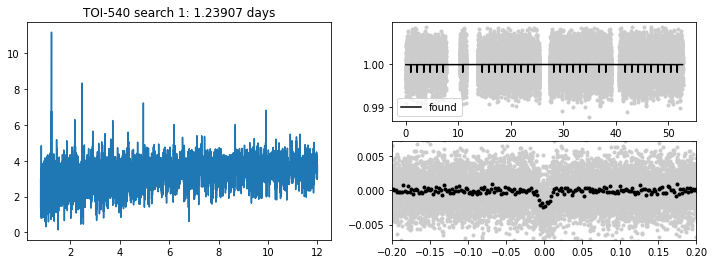

In [16]:
from nuance.utils import phase

plt.figure(None, (12, 4))
t0, D, P = search2.best

plt.subplot(2, 2, (1, 3))
plt.plot(search2.periods, search2.Q_snr)
plt.title(f"TOI-540 search 1: {P:.5f} days")

mean, astro, noise = nu2.models(t0, D, P)

plt.subplot(2, 2, 2)
plt.plot(nu2.time, nu2.flux, ".", c="0.8")
plt.plot(nu2.time, astro + mean, c="k", label="found")
ylim = plt.ylim()
_ = plt.legend()

plt.subplot(2, 2, 4)
mean, astro, noise = nu2.models(t0, D, P)
phi = phase(nu2.time, t0, P)
detrended = nu2.flux - noise - mean
plt.plot(phi, detrended, ".", c=".8")
plt.plot(*binn(phi, detrended, 50), ".", c="k")
plt.xlim(*(np.array([-1, 1])*10*D))
plt.ylim(*(np.array([-1, 1])*float(np.abs(astro.min()))*4))